In [1]:
import pandas as pd
import MyLib.nlp as nlp
import MyLib.HTML_prep as HTML_prep
import MyLib.analysis as analysis 
import MyLib.hype as hype 
from ipywidgets import interactive, interact

%load_ext autoreload
%autoreload 2

# 1. Publications over time

In [65]:
freq="M"
df=pd.read_json("2023-06-06_Zotero_AI_nlp_en2.json")
print(len(df))

df_publ=df.drop_duplicates(subset="FileKey")[["date","FileKey"]]
df_publ=df_publ.set_index("date").groupby(pd.Grouper(freq=freq)).count()
df_publ.columns=["Publications"]

1622


# 2. Most common words

In [110]:
# ChatGPT_Terms="ChatGPT, GPT3, GPT4, OpenAI, AI, LLM, A.I, GPT, Chatbot, technology, tool, app, Artificial Intelligence, Large Language Models"


In [10]:
df["NoStopwords_Set"]=df.NoStopwords.apply(lambda x: list(x))
Lists=df.NoStopwords_Set.to_list()


[('ai', 2642), ('chatgpt', 1762), ('chatbot', 1611), ('human', 975), ('work', 963), ('research', 922), ('student', 870), ('use', 852), ('datum', 787), ('university', 713), ('system', 676), ('information', 665), ('technology', 605), ('example', 558), ('new', 553)] [('ai', 2642), ('chatgpt', 1762), ('chatbot', 1611), ('human', 975), ('work', 963), ('research', 922), ('student', 870), ('use', 852), ('datum', 787), ('university', 713), ('system', 676), ('information', 665), ('technology', 605), ('example', 558), ('new', 553)]


<AxesSubplot: ylabel='word'>

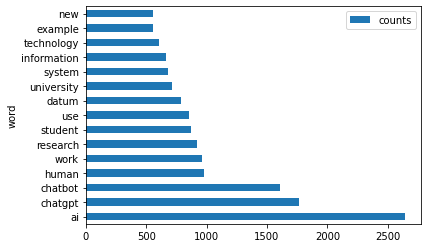

In [38]:
Lists=df.NoStopwords.to_list()

Lists=[i for i in Lists if i!=None]
Words=[item for sublist in Lists for item in sublist]

from collections import Counter
a_counter = Counter(Words)
most_common = a_counter.most_common(15)

print(most_common, most_common2)
pd.DataFrame.from_records(most_common,columns=["word","counts"],index="word").plot.barh()

# Finding the most hyping universities, articles, and sentences

In [111]:
from nltk.tokenize import sent_tokenize


df["AI_sentences"]=df.AI_paragraphs.apply(sent_tokenize)
df=df.explode("AI_sentences").drop_duplicates(subset=["AI_sentences"]).dropna(subset=["AI_sentences"]).reset_index()


In [112]:
# Redo the NLP for AI Sentences as the DF structure changed (explode)

df_Sentences=nlp.NLP_Pipeline(df, sentiment=False, language="en",translate=False, column="AI_sentences")

Current Time = 12:21:28
Lenght:  5807
cleaning done.
Current Time = 12:21:30
Current Time = 12:22:26
language detection done.
pure english text done. Next: Token & Lemmatizing.
Current Time = 12:22:26
Token & Lemmatizing done. Next: Remove Stopwords.
Current Time = 12:24:03
Current Time = 12:24:03


In [134]:
#len(df_Sentences.drop_duplicates(subset="AI_sentences"))


In [114]:
df_Sentences.to_json("2023-06-14_HypeSentences.json")

In [40]:
hype_selection=hype.hype_selection # OR: hype.Key_hypes

#hype_selection=hype.Key_hypes

df["hype_word"]=df.AI_sentences.apply(hype.hype_word,keys=hype_selection)
df["hype_sentence"]=df.AI_sentences.apply(hype.hype_sentence,keys=hype_selection)


df["hype_n"]=df.hype_word.apply(lambda x: len(x) if isinstance(x,list) else 0)
df=df.sort_values("hype_n", ascending=False).drop_duplicates(subset="AI_sentences")



In [41]:

Counts=pd.DataFrame({"publications": df.drop_duplicates(subset="FileKey").value_counts("Uni"), 
                     "sentences":df.value_counts("Uni"),
                    "hypewords":df.groupby("Uni").sum()["hype_n"]})
Counts["mean hype-words"]=Counts["hypewords"]/Counts["sentences"]
Counts

,publications,sentences,hypewords,mean hype-words
Uni,,,,
Delft University,22,331,13,0.039275
Eindhoven University of Technoloy,27,770,29,0.037662
Leiden University,40,428,19,0.044393
Maastricht Univerisity,26,494,36,0.072874
OpenUniversiteitNederland,12,119,1,0.008403
Radboud Nijmegen,28,374,19,0.050802
Rotterdam University,29,493,82,0.166329
Tilburg University,12,234,13,0.055556
University of Amsterdam,24,304,29,0.095395


In [42]:
pd.options.display.max_colwidth = 500
hype_sentences=df.iloc[:12,-4:]
hype_sentences
hype_sentences.to_excel("hype_sentences.xlsx")

In [48]:
hype_sentences=df[['Uni','date',"hype_n","AI_sentences",'word_count','hype_word']]
#hype_sentences["hype_ratio"]=hype_sentences["hype_n"]/hype_sentences["word_count"]
#hype_sentences.drop_duplicates(subset="AI_sentences")
hype_sentences.sort_values(by="hype_n", ascending=False).head(10)

,Uni,date,hype_n,AI_sentences,word_count,hype_word
825,Rotterdam University,2022-05-24,3,"This shift has offered the opportunity to expand and grow both research and educational practice in many novel directions, but in these increasingly self-directed learning environments the need for students to be able to effectively self-regulate their learning is more important than ever.",72,"[important, novel, effectively]"
739,Rotterdam University,2023-04-25,3,"Can you discuss any particularly innovative or groundbreaking projects currently being undertaken at the centre?One of the notable projects is the EUR Smart Campus Project,Opens external which aims to utilise data and digitalisation to create awareness around sustainability and human well-being.",712,"[notable, innovative, particularly]"
843,Rotterdam University,2023-04-25,2,"One highlight from this project included securing three critically important partners for the proposal with just four days until the deadline: a 5G partner, a major international industry partner and the leading European human rights organization.Additionally, I led the collaboration between EUR and TU Delft for the launch of Zuid Holland SME AI clinics within the NWO funded ROBUST programOpens external, from which EUR also has its first 2 ICAI Labs.",759,"[important, highlight]"
13,Radboud Nijmegen,2023-01-01,2,"Text generation can play a major part in this problem; however, text generation models still suffer from a major problem: Hallucinations, adding unimportant / irrelevant / fictitious information to texts that should not be there.",165,"[important, relevant]"
161,Leiden University,2023-04-01,2,Our speakers will also highlight the importance of creating inclusive AI systems that take into account the needs and perspectives of diverse communities.,102,"[importance, highlight]"
874,Rotterdam University,2023-03-28,2,Could ChatGPT disrupt capitalism by establishing an equal level-playing field by offering novel tools and knowledge to ordinary people?,624,"[novel, disrupt]"
740,Rotterdam University,2023-04-25,2,"Topics include data quality, privacy, ethics, accountability, cybersecurity, and private property.In recent years, public awareness and use of algorithms have grown significantly, with costs decreasing and AI as a service becoming more commonly available.",745,"[significant, significantly]"
61,Radboud Nijmegen,2023-04-01,2,Will ChatGPT fundamentally change our educational system?,60,"[fundamentally, fundamental]"
499,Utrecht University,2021-02-05,2,“The chatbot will know exactly what questions need to be asked in order to process the report successfully.”,77,"[successfully, exactly]"
1317,Eindhoven University of Technoloy,2019-05-02,2,"But maybe in your case better try to hack into the folder.”But the most relevant finding was that we found parts of self-compassion reflected in participants’ answers, particularly in response to care-receiving Vincent:“Just remember that it can happen to anyone and that it’s not your fault.”“There are worse things that could happen.”“Stay positive and keep trying until you succeed.”Results and implicationsFirst, we learned that Vincent was able to develop a shared narrative with our partici...",742,"[relevant, particularly]"


C:\Users\mr\AppData\Local\Temp\ipykernel_14984\981272799.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  hype_df[hype_df.index>pd.datetime(2022,1,1)]["Hypewords"].plot(title=f"n_hypewords peer {freq}",legend=True)
C:\Users\mr\AppData\Local\Temp\ipykernel_14984\981272799.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_publ[df_publ.index>pd.datetime(2022,1,1)]["Publications"].plot(legend=True)


<AxesSubplot: title={'center': 'n_hypewords peer M'}, xlabel='date'>

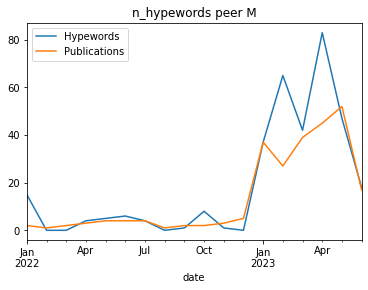

In [49]:
freq="M"

hype_time=hype_sentences.set_index("date").groupby(pd.Grouper(freq=freq))


hype_df=pd.DataFrame()
hype_df["Hypewords"]=hype_time["hype_n"].apply(lambda x: sum(x) if len(x)>0 else 0)
#hype_df["n"]=hype_time["hype_n"].apply(lambda x: len(x) if len(x)>0 else 0)

hype_df[hype_df.index>pd.datetime(2022,1,1)]["Hypewords"].plot(title=f"n_hypewords peer {freq}",legend=True)
df_publ[df_publ.index>pd.datetime(2022,1,1)]["Publications"].plot(legend=True)


In [51]:
hype_time=hype_sentences.set_index("date").groupby(pd.Grouper(freq='W'))
hype_time

In [52]:
from collections import Counter


keyWords="chatgpt,education,chatbot,university,create,write,produce,answer,tool,human,skill,knowledge,bias,assignment,intelligence,artificial,test,evaluate,assessment,plagiarism"
keyWords="education,chatbot,create,write,produce,answer,tool,human,skill,knowledge,bias,assignment,intelligence,artificial,test,evaluate,assessment,plagiarism"

keyWords=keyWords.split(",")
print(keyWords)

group=df.set_index("date").groupby(pd.Grouper(freq='M'))["NoStopwords"].sum()

Wordyear={}
Wordyear_exact={}
Wordyear_only={}
for i, row in group.iteritems():
    
    #print(i,row)
    if type(row)==list:
        
        ## filter ROW for interesting key-words:
        row=[i for i in row if i in keyWords]
        
        c=Counter(row).most_common(5)
        
        c_exact=[(i[0],i[1]/len(group)) for i in c]

        c=[(i[0],str(round(i[1]/len(group)*100,2))+"%") for i in c]
        c_only=[i[0] for i in c]


        Wordyear[str(i)]=c
        Wordyear_exact[str(i)]=c_exact
        Wordyear_only[str(i)]=c_only
        
        
        
    #print(c,"\n")
    
CountDF=pd.DataFrame.from_dict(Wordyear, orient='index').T


CountDF.T[CountDF.T.index>"2022-10-01"]

['education', 'chatbot', 'create', 'write', 'produce', 'answer', 'tool', 'human', 'skill', 'knowledge', 'bias', 'assignment', 'intelligence', 'artificial', 'test', 'evaluate', 'assessment', 'plagiarism']


,0,1,2,3,4
2022-10-31 00:00:00,"(knowledge, 79.93%)","(artificial, 31.29%)","(intelligence, 31.29%)","(create, 11.9%)","(chatbot, 8.16%)"
2022-11-30 00:00:00,"(chatbot, 12.59%)",None,None,None,None
2022-12-31 00:00:00,"(write, 36.39%)","(answer, 16.67%)","(human, 10.88%)","(skill, 7.82%)","(artificial, 7.82%)"
2023-01-31 00:00:00,"(write, 113.27%)","(tool, 111.22%)","(answer, 102.72%)","(chatbot, 100.34%)","(human, 94.22%)"
2023-02-28 00:00:00,"(chatbot, 607.82%)","(human, 521.43%)","(write, 228.23%)","(knowledge, 148.64%)","(skill, 124.15%)"
2023-03-31 00:00:00,"(answer, 471.09%)","(chatbot, 399.32%)","(write, 327.55%)","(create, 182.99%)","(tool, 176.19%)"
2023-04-30 00:00:00,"(human, 151.7%)","(create, 149.66%)","(education, 141.84%)","(knowledge, 126.87%)","(intelligence, 72.45%)"
2023-05-31 00:00:00,"(education, 185.03%)","(intelligence, 177.55%)","(artificial, 171.77%)","(chatbot, 156.8%)","(write, 131.63%)"
2023-06-30 00:00:00,"(intelligence, 159.18%)","(artificial, 124.49%)","(education, 84.35%)","(human, 78.23%)","(write, 54.08%)"


In [53]:
CountDF=pd.DataFrame.from_dict(Wordyear_only, orient='index').T
CountDF.T[CountDF.T.index>"2022-10-01"]

,0,1,2,3,4
2022-10-31 00:00:00,knowledge,artificial,intelligence,create,chatbot
2022-11-30 00:00:00,chatbot,None,None,None,None
2022-12-31 00:00:00,write,answer,human,skill,artificial
2023-01-31 00:00:00,write,tool,answer,chatbot,human
2023-02-28 00:00:00,chatbot,human,write,knowledge,skill
2023-03-31 00:00:00,answer,chatbot,write,create,tool
2023-04-30 00:00:00,human,create,education,knowledge,intelligence
2023-05-31 00:00:00,education,intelligence,artificial,chatbot,write
2023-06-30 00:00:00,intelligence,artificial,education,human,write


In [54]:
#df=df.drop_duplicates("text_clean")

In [ ]:
#This cell allows to read the words before and after a search_word. You can change the searchword & the size of the context.
@interact(search_word="education",words_before=(0,10),words_after=(0,10))
def text_context(column=["text_clean","pure_text","NoStopwords","AI_sentences"],search_word="education",words_before=1,words_after=1):
    df[column].dropna().apply(analysis.Keyword_context,search_word=search_word.lower(),context=(words_before,words_after))


In [116]:
#This cell allows to read the words before and after a search_word. You can change the searchword & the size of the context.
@interact(search_word="education",words_before=(0,10),words_after=(0,10))
def text_context(column=["text_clean","pure_text","NoStopwords","AI_sentences"],search_word="education",words_before=1,words_after=1):
    df_Sentences[column].dropna().apply(analysis.Keyword_context,search_word=search_word.lower(),context=(words_before,words_after))


interactive(children=(Dropdown(description='column', options=('text_clean', 'pure_text', 'NoStopwords', 'AI_se…

In [126]:
# WORD _GRAPH ANALYSIS

G=analysis.Word_NetworkGen(df_Sentences,n=500,column="NoStopwords")
G2=analysis.CleanGraph(G,removeIsolates=True,minDegree=2,only_largest_component=True)
#G2=G
analysis.writeNetworkHTML(G2,view=False)
print("see the network: The_network.html")

[(('topic', 'research'), 335), (('ai', 'ai'), 316), (('list', 'research'), 282), (('topic', 'topic'), 259), (('university', 'university'), 255)]
Cleaning Graph to minimum Degree 2.
Nodes count:  85
Edges count:  357
see the network: The_network.html


In [128]:
Centrality=pd.DataFrame(nx.closeness_centrality(G), index=[0]).T.sort_values(by=0,ascending=False)

Centrality.columns=["closeness-Centrality_per_sentence"]
Centrality.head(10)

,closeness-Centrality_per_sentence
ai,0.572495
research,0.528737
university,0.512418
topic,0.488304
concept,0.485449
list,0.463753
student,0.461176
create,0.461176
chatgpt,0.461176
work,0.446300


In [129]:
import networkx as nx
nx.write_gexf(G, "NoStopwords.gexf")

# Link Analysis 

In [135]:
import networkx as nx

df=pd.read_json("2023-06-06_Zotero_AI_nlp_en2.json")
links=df[["url","linkUrl"]].drop_duplicates(subset="url").explode("linkUrl")

In [136]:
def domain_From_url(url):
    if isinstance(url,str):
        domain=url.replace("https://","").replace("http://","").replace("www.","").split("/")[0].lstrip(".")
        domain=domain.rsplit("@",1)[-1].rsplit("%20",1)[-1]
        if domain.count(".")>1:
            domain=".".join(domain.rsplit(".",2)[-2:])

        if "." in domain:
            return domain
    
    


links["source"]=links.url.apply(domain_From_url)
links["target"]=links.linkUrl.apply(domain_From_url).reindex()

In [153]:
links=links.dropna(subset="target").dropna(subset="source")
links=links[~links["url"].apply(lambda x: "linkedin.com" in x)]
edgelist=(zip(links["source"], links["target"]))

links[links["source"]==None]
G = nx.from_edgelist(edgelist)
nx.write_gexf(G,"Links.gexf")
Link_Centrality=pd.DataFrame(nx.closeness_centrality(G),index=[0]).T.sort_values(ascending=False, by=0)
Link_Centrality.columns=["Centrality"]
Link_Centrality.head(10)

,Centrality
openai.com,0.436815
linkedin.com,0.418636
youtube.com,0.413075
facebook.com,0.410595
rug.nl,0.391782
twitter.com,0.388666
uu.nl,0.381300
uva.nl,0.375440
ru.nl,0.369358
tudelft.nl,0.368562


In [147]:
edgelist=(zip(links["source"], links["target"]))
edges=list(edgelist)

In [148]:
from collections import Counter
pd.DataFrame(Counter(edges).most_common(15))

,0,1
0,"(vu.nl, vu.nl)",229
1,"(tudelft.nl, tudelft.nl)",188
2,"(uu.nl, uu.nl)",171
3,"(utwente.nl, utwente.nl)",155
4,"(ru.nl, ru.nl)",128
5,"(tue.nl, tue.nl)",102
6,"(universiteitleiden.nl, universiteitleiden.nl)",92
7,"(wur.nl, wur.nl)",90
8,"(maastrichtuniversity.nl, maastrichtuniversity.nl)",86
9,"(eur.nl, eur.nl)",72


In [653]:
links=df.linkUrl.to_list()
links=[list(set(l))for l in links if type(l)==list]
links=[i for s in links for i in s if i!=None]
domains=[domain_From_url(i) for s in links for i in s if i!=None]

In [654]:

from collections import Counter
a_counter = Counter(links)
most_common = a_counter.most_common(15)
most_common

[('https://www.facebook.com/vuamsterdam', 128),
 ('https://www.youvisit.com/tour/vuamsterdam', 128),
 ('https://www.youtube.com/user/vrijeuniversiteit', 128),
 ('https://twitter.com/VUamsterdam', 128),
 ('https://www.instagram.com/vuamsterdam/', 128),
 ('https://www.linkedin.com/school/vrije-universiteit-amsterdam/', 128),
 ('https://vu.nl/en/alumni', 119),
 ('https://vu.nl/en/about-vu', 119),
 ('https://vu.nl/en/about-vu/divisions/university-library', 119),
 ('https://studiegids.vu.nl/en', 119),
 ('https://vu.nl/en/education', 119),
 ('https://vu.nl/en/research', 119),
 ('https://workingat.vu.nl/home', 119),
 ('https://vu.nl/en/about-vu/more-about/faculties-vrije-universiteit-amsterdam',
  119),
 ('https://vu.nl/en/education/professionals', 119)]

In [655]:
links=df.linkUrl.to_list()